### Extract orthogonal slices from full MRI volume

In [16]:
import pydicom
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [17]:
path = f"volume"
slices = [pydicom.dcmread(os.path.join(path, f)) for f in os.listdir(path)]
slices = sorted(slices, key = lambda dcm: dcm.ImagePositionPatient[0])

# dimensions
print()
print(f"{len(slices)} of size {slices[0].Rows}x{slices[0].Columns}")

# modality?
print()
print(f"Modality: {slices[0].Modality}")

# slice spacing
print()
print(f"Pixel Spacing: {slices[0].PixelSpacing}, slice thickness: {slices[0].SliceThickness}")



24 of size 320x260

Modality: MR

Pixel Spacing: [0.6875, 0.6875], slice thickness: 5


In [18]:
# Load into numpy array
image_data = np.stack([s.pixel_array for s in slices])
print(image_data.shape)

(24, 320, 260)


Saving axial: 


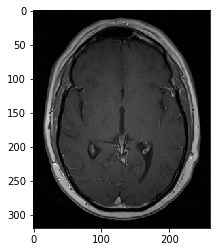

In [19]:
print("Saving axial: ")
# Extract slice
axial = image_data[image_data.shape[0]//2]
plt.imshow(axial, cmap="gray")
# Save using full-range window
im = Image.fromarray((axial/np.max(axial)*0xff).astype(np.uint8), mode="L")
im.save("axial.png")

Saving sagittal: 
(24, 320)


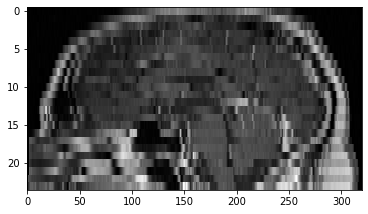

In [20]:
print("Saving sagittal: ")
# Extract slice
sagittal = image_data[:,:, image_data.shape[2]//2]
# Compute aspect ratio
aspect = slices[0].SliceThickness / slices[0].PixelSpacing[0]
print(sagittal.shape)
plt.imshow(sagittal, cmap="gray", aspect = aspect)
# Save using full-range window
im = Image.fromarray((sagittal/np.max(sagittal)*0xff).astype(np.uint8), mode="L")
im = im.resize((sagittal.shape[1], int(sagittal.shape[0] * aspect)))
im.save("sagittal.png")

Saving coronal: 
(24, 260)


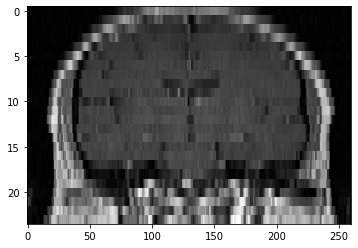

In [21]:
print("Saving coronal: ")
# Extract slice
coronal = image_data[:, image_data.shape[1]//2, :]
# Compute aspect ratio
aspect = slices[0].SliceThickness / slices[0].PixelSpacing[0]
print(coronal.shape)
plt.imshow(coronal, cmap="gray", aspect = aspect)
# Save using full-range window
im = Image.fromarray((coronal/np.max(coronal)*0xff).astype(np.uint8), mode="L")
im = im.resize((coronal.shape[1], int(coronal.shape[0] * aspect)))
im.save("coronal.png")